<a href="https://colab.research.google.com/github/drpetros11111/fundamentals-of-computer-vision-theory-projects-in-python/blob/main/neural_net_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
X,y = sklearn.datasets.make_moons(200, noise = 0.15)

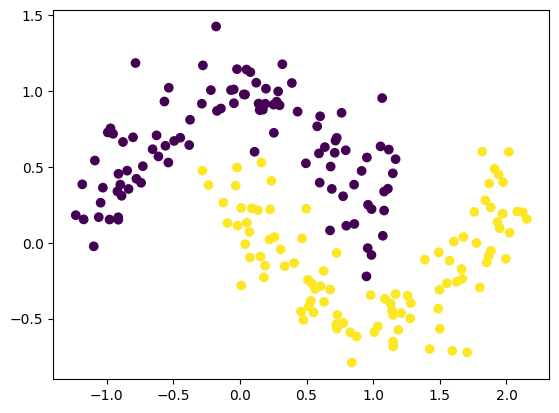

In [3]:
plt.scatter(X[:,0],X[:,1], c=y)

In [4]:
print(X.shape, y.shape)

(200, 2) (200,)


In [ ]:
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

# Lamda Reguralization Function
In the provided code snippet, lambda_reg is used for regularization in machine learning models.

Regularization is a technique used to prevent overfitting by adding a penalty to the loss function based on the magnitude of the model's parameters.


Regularization helps to prevent overfitting by adding a regularization term to the loss function. There are different types of regularization, but the most common are L1 (Lasso) and L2 (Ridge) regularization:

L1 Regularization (Lasso): Adds the sum of the absolute values of the coefficients (weights) as a penalty term.

L2 Regularization (Ridge): Adds the sum of the squared values of the coefficients (weights) as a penalty term.

-----------
##Example
If you are using L2 regularization, the loss function L is modified as follows:

$$𝐿
=
𝐿
original
+
𝜆
∑
𝑖
𝑤
𝑖
^2
$$
​


Where:

$$𝐿$$
original
L
original
​
  is the original loss (e.g., cross-entropy loss).
$$𝜆$$
λ is the regularization parameter (lambda_reg in the code).
$$𝑤
𝑖
$$
​
  are the model parameters (weights).

This regularization term penalizes large weights and encourages the model to keep the weights smaller, which can help in generalizing better to new data.

----
Integrating Regularization into Your Training Loop:

In a typical training loop, you would add the regularization term to your loss function before performing backpropagation. Here's a simplified example:

    for epoch in range(num_epochs):
       optimizer.zero_grad()
       output = network(X)
       loss = loss_function(output, y)

       # Adding L2 regularization term
       l2_reg = lambda_reg * sum(param.pow(2).sum() for param in network.parameters())
       loss += l2_reg

       loss.backward()
       optimizer.step()

In this example:

loss_function(output, y) computes the original loss.

lambda_reg * sum(param.pow(2).sum() for param in network.parameters()) computes the L2 regularization term.

loss += l2_reg adds the regularization term to the original loss.

The rest of the code performs backpropagation and updates the model parameters.

In [5]:
def retreive(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [ ]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return z1, a1, softmax

# Forward Propagation Function
This code snippet defines a forward propagation function for a simple neural network with one hidden layer.

The function forward takes an input matrix x and a dictionary model_dict containing the model's parameters, and it returns the intermediate and final outputs of the network.

-----
## Retrieving Model Parameters:

    W1, b1, W2, b2 = retreive(model_dict)

This line retrieves the weights and biases of the network from model_dict.

###Specifically:

W1 and b1 are the weights and biases for the first (hidden) layer.

W2 and b2 are the weights and biases for the second (output) layer.

-----
##First Layer Computations:

    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z1 = x.dot(W1) + b1

This computes the linear combination of the input x and the weights W1, adding the bias b1.

The result is the input to the activation function of the first layer.

------
    a1 = np.tanh(z1)

This applies the hyperbolic tangent activation function to z1, resulting in the activations of the first layer.

------
##Second Layer Computations:

    z2 = a1.dot(W2) + b2
    z2 = a1.dot(W2) + b2

This computes the linear combination of the activations from the first layer a1 and the weights W2, adding the bias b2.

The result is the input to the activation function of the second layer.

----
##Softmax Output Computation

    exp_scores = np.exp(z2)

    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


###exp_scores = np.exp(z2)

This exponentiates z2 element-wise. The exponential function is used here as part of the softmax computation.

Applying the Exponential Function:
We apply the exponential function to each element of the logits:

Let's calculate the exponential of each element in z2:

$$exp
⁡
(
2.0
)
=
𝑒
2
≈
7.389$$

$$exp(2.0)=e
2
 ≈7.389$$

$$exp
⁡
(
1.0
)
=
𝑒
1
≈
2.718$$

$$exp(1.0)=e
1
 ≈2.718
exp
⁡
(
0.1
)
=
𝑒
0.1
≈
1.105$$

$$exp(0.1)=e
0.1
 ≈1.105$$
So, exp_scores will be:

    exp_scores = np.array([7.389, 2.718, 1.105])

##Contextualizing with the Softmax Function:
The softmax function involves normalizing these exponentiated scores so that they sum to 1.

This is done by dividing each exponentiated score by the sum of all exponentiated scores:

    softmax = exp_scores / np.sum(exp_scores)


Let's calculate the sum of exp_scores:

$$Sum =
7.389
+
2.718
+
1.105
=
11.212$$

Now, normalize each exponentiated score:

##Softmax of class 1:
$$7.389/
11.212
≈
0.659$$

$$11.212
7.389
​
 ≈0.659$$

##Softmax of class 2:
$$2.718/
11.212
≈
0.242
11.212
2.718
​
 ≈0.242$$

##Softmax of class 3:
$$1.105/
11.212
≈
0.099
11.212
1.105
​
 ≈0.099$$

The final probabilities (softmax output) will be:

    softmax = np.array([0.659, 0.242, 0.099])


###softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

This normalizes the exponentiated scores to obtain the softmax probabilities. The softmax function ensures that the output probabilities sum to 1 for each input sample.

-----
Return Values:

    return z1, a1, softmax

The function returns three values:

z1: The linear combination before the activation function in the first layer.
a1: The activations of the first layer.
softmax: The final output probabilities from the softmax function.
------

##Full Code Context
To fully understand the snippet, let's assume the presence of the retreive function and a hypothetical example of model_dict:

#Example Model Dictionary and Retrieve Function

    def retreive(model_dict):
       W1 = model_dict['W1']
       b1 = model_dict['b1']
       W2 = model_dict['W2']
       b2 = model_dict['b2']
       return W1, b1, W2, b2

    model_dict = {
       'W1': np.random.randn(input_size, hidden_size),
       'b1': np.random.randn(1, hidden_size),
       'W2': np.random.randn(hidden_size, output_size),
      'b2': np.random.randn(1, output_size)
   }

-----   
#Example Usage

    x = np.random.randn(num_samples, input_size)
    z1, a1, softmax = forward(x, model_dict)
    print(softmax)

In this example:

x is the input data matrix with num_samples rows and input_size columns.
model_dict contains randomly initialized weights and biases.

The forward function computes the forward pass, producing the intermediate and final outputs of the network.

This is a straightforward implementation of a forward pass in a neural network with one hidden layer, using the tanh activation function and softmax output.

In [8]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss+= reg_loss
    return float(loss / y.shape[0])

# Loss Function
The loss function calculates the loss of a neural network with a softmax output, given the true labels. It also includes a regularization term to prevent overfitting.

-----
## Function Parameters
## softmax

The predicted probabilities from the softmax function, a 2D array where each row corresponds to the predicted probability distribution for a sample.

##y

The true labels, an array where each element is the correct class index for a corresponding sample.

##model_dict

A dictionary containing the model parameters (weights and biases).

-----
#Steps in the Function
##Retrieve Model Parameters:

    W1, b1, W2, b2 = retreive(model_dict)

This line retrieves the weights and biases from model_dict.

##Initialize Array for Correct Class Probabilities:

    m = np.zeros(200)

An array m of zeros with the same length as the number of samples is initialized.

This will store the predicted probabilities for the correct classes.

##Extract Probabilities for Correct Classes:

    for i, correct_index in enumerate(y):
       predicted = softmax[i][correct_index]
       m[i] = predicted

This loop iterates over each sample and its true label (correct_index).

It extracts the probability assigned to the correct class from the softmax output and stores it in m.

The correct_index in each iteration is used to find the predicted probability for the true class label of the current sample.

This probability is then used to calculate the log loss, which measures the model's performance by evaluating how well the predicted probabilities match the true class labels.

In essence, correct_index helps in identifying the relevant probability from the softmax output that corresponds to the true class of each sample, which is crucial for calculating the log loss accurately.

#What the enumerate Command Does
The enumerate function in Python adds a counter to an iterable (like a list, tuple, or string) and returns it as an enumerate object.

This allows you to loop through the iterable and have an automatic counter that provides both the index and the value of each item in the iterable.

##Example:

    fruits = ['apple', 'banana', 'cherry']
    for index, fruit in enumerate(fruits):
    print(index, fruit)

##Output:

0 apple
1 banana
2 cherry

In this example, enumerate(fruits) returns an enumerate object that yields pairs of (index, value) for each item in the fruits list.

Thus, index goes from 0 to 2, and fruit takes on the values 'apple', 'banana', and 'cherry'.


##Compute the Log Probability:

    log_prob = -np.log(m)

This computes the negative logarithm of the probabilities stored in m.

This is the log loss (cross-entropy loss) for the correct class predictions.

##Sum of Log Probabilities:

    loss = np.sum(log_prob)

This sums up all the log probabilities to get the total loss.

##Add Regularization Loss:

    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))

    loss += reg_loss

This computes the L2 regularization loss for W1 and W2.

The regularization term helps prevent overfitting by penalizing large weights. The term is scaled by lambda_reg / 2.

##Return the Average Loss

    return float(loss / y.shape[0])

Finally, the total loss (including regularization) is divided by the number of samples to get the average loss, which is then returned.

-----
#Example with a Small Dataset
Let's consider an example with 3 samples and 2 classes to make this more concrete.

##Predicted probabilities (softmax):

    softmax = np.array([[0.7, 0.3],
                        [0.2, 0.8],
                        [0.6, 0.4]])

##True labels (y):

    y = np.array([0, 1, 0])

##Model parameters (model_dict):

    model_dict = {
       'W1': np.random.randn(2, 3),
       'b1': np.random.randn(3),
       'W2': np.random.randn(3, 2),
       'b2': np.random.randn(2)
      }
-----     
#The function steps would look like this:

##Retrieve W1, b1, W2, b2 from model_dict.

##Initialize m as an array of zeros with length 3.

##Extract correct class probabilities:

For sample 1: m[0] = 0.7 (probability of class 0)
For sample 2: m[1] = 0.8 (probability of class 1)
For sample 3: m[2] = 0.6 (probability of class 0)

#To calculate the log loss, we focus on the predicted probability of the true class for each sample, not necessarily the higher probability.

The log loss for a single sample is calculated using the probability assigned to the correct class.
##Compute log probabilities:
    log_prob = -np.log([0.7, 0.8, 0.6])

#Generalization to More Than Two Classes:
The approach remains the same for more than two classes. Each entry in the y array should still contain the index of the true class.

For each sample, you extract the predicted probability for the true class and calculate the log loss.

Example with Three Classes:
python
Copy code
softmax = np.array([
    [0.1, 0.7, 0.2],  # Predicted probabilities for Sample 1
    [0.4, 0.4, 0.2],  # Predicted probabilities for Sample 2
    [0.3, 0.2, 0.5]   # Predicted probabilities for Sample 3
])

    y = np.array([1, 0, 2])  # True class indices for each sample

To calculate the log loss:

For Sample 1: predicted_probability = 0.7, so log_loss += -np.log(0.7)

For Sample 2: predicted_probability = 0.4, so log_loss += -np.log(0.4)

For Sample 3: predicted_probability = 0.5, so log_loss += -np.log(0.5)

##Sum these log probabilities and divide by the number of samples to get the average log loss.

##Code Implementation

    log_loss = 0
    for i, correct_index in enumerate(y):
       predicted_probability = softmax[i][correct_index]
       log_loss += -np.log(predicted_probability)
        log_loss /= len(y)
        print("Log Loss:", log_loss)

This method ensures that the log loss is calculated correctly for each sample by using the predicted probability of the true class and then averaging over all samples.

##Sum log probabilities to get the loss.

#Compute regularization loss using lambda_reg.

##Return the average loss.

------------
##Final Code
Here is the complete loss function:

    def loss(softmax, y, model_dict):
       W1, b1, W2, b2 = retreive(model_dict)
       m = np.zeros(len(y))  # Adjusted length to match y
       for i, correct_index in enumerate(y):
          predicted = softmax[i][correct_index]
          m[i] = predicted
          log_prob = -np.log(m)
          loss = np.sum(log_prob)
           lambda_reg = 0.01  # Assuming lambda_reg is defined
           reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
           loss += reg_loss
      return float(loss / y.shape[0])

This function effectively computes the cross-entropy loss with an L2 regularization term included.

In [ ]:
def predict(model_dict, x):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)   # (200,2)
    return np.argmax(softmax, axis = 1)    # (200,)

### Equations for Backprop

![backprop](https://user-images.githubusercontent.com/30661597/67566804-3e405980-f75b-11e9-9e19-f3c388745c0a.png)

## $\frac{\partial L}{\partial y_{1}}=-\tilde{y}_{1}\left[\frac{\left(y_{1}\right)^{\prime}}{y_{1}}\right]=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]$

## $\frac{\partial y_{1}}{\partial z_{1}}=\frac{\partial}{\partial z_{1}} \cdot \frac{e^{z_{1}}}{e^{z_{1}}+e^{z_{2}}+e^{z_{3}}}$

![der](https://user-images.githubusercontent.com/46392773/56460220-ec94cc00-63d1-11e9-91d1-b4e3c57c81fd.png)


## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]\frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{y_{1}\left(1-y_{1}\right)}{y_{1}}\right]=-\tilde{y}_{1}\left(1-y_{1}\right)$

Recall that our labels are in the form of a one-hot vector: (ex. If class 1 is correct, then the corresponding label is [1,0], if class 2 is correct, then the corresponding label is [0,1]).

If class one is the actual prediction: $\tilde{y}_{1} = 1 $, then we have:

## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}} = -1(1-y_{1}) = y_{1} - 1 = \delta_{3}$

## $\delta_{2}=\left(1-\tanh ^{2} z_{1}\right) \circ \delta_{3} W_{2}^{T}$

## $\frac{\partial L}{\partial W_{2}}=a_{1}^{T} \delta_{3}$

## $\frac{\partial L}{\partial b_{2}}=\delta_{3}$

## $\frac{\partial L}{\partial W_{1}}=x^{T} \delta 2$

## $\frac{\partial L}{\partial b_{1}}=\delta 2$

In [ ]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2)
        dW2 = (a1.T).dot(delta3)               # (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)
        dW1 += lambda_reg * np.sum(W1)
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))

    return model_dict

In [ ]:
# Define Initial Weights
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    # Xavier Initialization
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
    return model

In [ ]:
def plot_decision_boundary(pred_func):
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary for hidden layer size 3")

In [ ]:
# Now Let's start the action
model_dict = init_network(input_dim = input_neurons , hidden_dim = 3, output_dim = output_neurons)
model = backpropagation(X, y, model_dict, 1000)
plot_decision_boundary(lambda x: predict(model, x))